# Exploratory Analysis and Visualization

This notebook contains some exploratory questions and analysis from the dataset

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")

In [2]:
# Import the dataset
df = pd.read_csv("../data/20240804_clean_data.csv.xz", compression="xz")
df.head()

,scientific_name,contig_acc,biosample_acc,target_acc,element_symbol,protein_acc,type,class,subclass,taxgroup_name,isolation_source,geo_loc_name,epi_type,host,year,country
0,Salmonella enterica,AAFUZC010000051.1,SAMN03098832,PDT000041084.2,blaDHA,NaN,AMR,BETA-LACTAM,CEPHALOSPORIN,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA
1,Salmonella enterica,AAFUZC010000051.1,SAMN03098832,PDT000041084.2,ble,EBK1426116.1,AMR,BLEOMYCIN,BLEOMYCIN,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA
2,Salmonella enterica,AAFUZC010000051.1,SAMN03098832,PDT000041084.2,blaNDM-1,EBK1426117.1,AMR,BETA-LACTAM,CARBAPENEM,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA
3,Salmonella enterica,AAFUZC010000073.1,SAMN03098832,PDT000041084.2,blaNDM-1,EBK1426163.1,AMR,BETA-LACTAM,CARBAPENEM,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA
4,Salmonella enterica,AAFUZC010000073.1,SAMN03098832,PDT000041084.2,ble,EBK1426164.1,AMR,BLEOMYCIN,BLEOMYCIN,Salmonella enterica,Unknown,USA,clinical,Unknown,NaN,USA


## Taxonomic groups

First, we can look at the overview of the dataset to identify the most abundant taxonomic groups in the dataset

<Axes: xlabel='count', ylabel='taxgroup_name'>

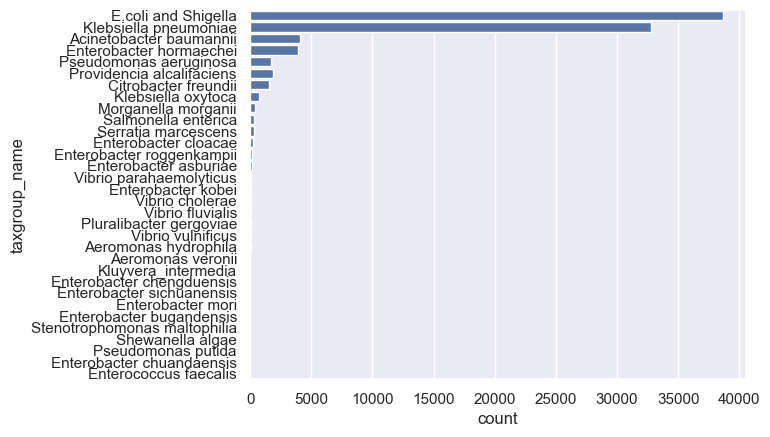

In [22]:
# Because there are duplicate entries in the dataset, I need to filter the dataframe to keep the unique entries for each taxonomy group

df_unique = df.drop_duplicates(subset=["taxgroup_name", "class", "biosample_acc"]).copy()

sns.countplot(df_unique, y="taxgroup_name", 
              order=df["taxgroup_name"].value_counts().index
              )

The most abundant groups are _E. coli_ and _Shigella_ and the species _Klebsiella pneumoniae_. We will focus our analysis in the latter group.

Also, I want to look at the most abundant categories of antibiotic resistance in the dataset

<Axes: xlabel='count', ylabel='class'>

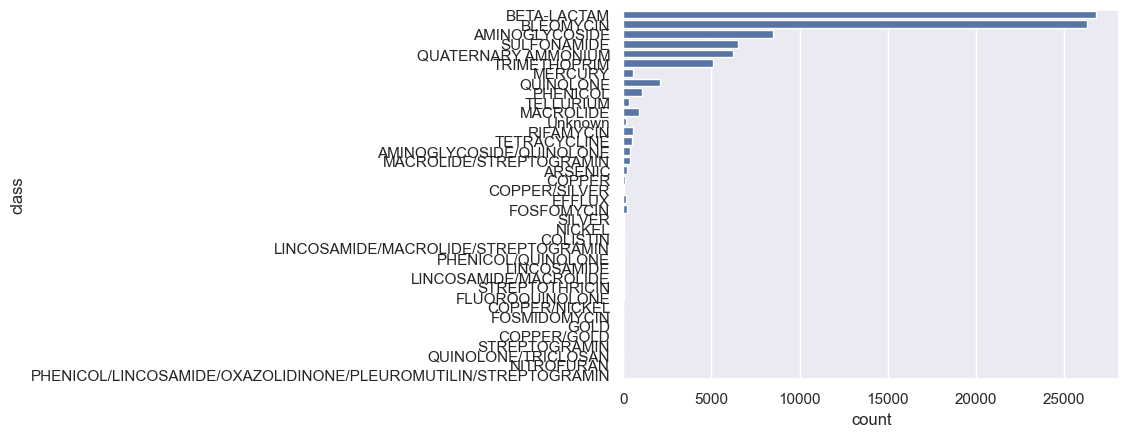

In [23]:
sns.countplot(df_unique, y="class", 
              order=df["class"].value_counts().index
              )

Beta-Lactam is the most abundant antibiotic class in the dataset. Something that we don't know at the moment if is that is the most abundant class for the _K. pneumoniae_ species

<Axes: xlabel='count', ylabel='class'>

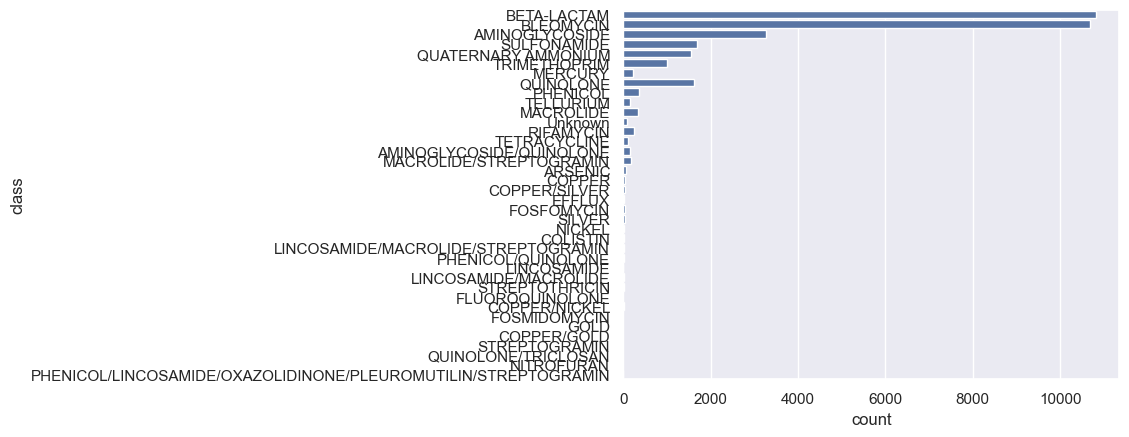

In [24]:
sns.countplot(df_unique[df_unique["taxgroup_name"] == "Klebsiella pneumoniae"],
              y="class", 
              order=df["class"].value_counts().index
              )

In [37]:
pd.pivot_table(df_unique[["taxgroup_name","class"]],
               index=["taxgroup_name"], 
               columns="class",
               aggfunc=len,
               fill_value=0)

class,AMINOGLYCOSIDE,AMINOGLYCOSIDE/QUINOLONE,ARSENIC,BETA-LACTAM,BLEOMYCIN,COLISTIN,COPPER,COPPER/GOLD,COPPER/NICKEL,COPPER/SILVER,...,QUINOLONE/TRICLOSAN,RIFAMYCIN,SILVER,STREPTOGRAMIN,STREPTOTHRICIN,SULFONAMIDE,TELLURIUM,TETRACYCLINE,TRIMETHOPRIM,Unknown
taxgroup_name,,,,,,,,,,,,,,,,,,,,,
Acinetobacter baumannii,159,0,0,1687,1667,1,0,0,0,0,...,0,15,0,0,3,81,0,32,40,0
Aeromonas hydrophila,1,0,3,3,3,3,0,0,0,0,...,0,0,0,3,0,3,0,3,3,0
Aeromonas veronii,2,0,2,3,3,0,0,0,0,0,...,0,0,0,0,0,2,0,2,2,0
Citrobacter freundii,103,18,7,530,490,0,6,0,0,5,...,0,50,5,0,0,69,4,10,41,0
E.coli and Shigella,4146,103,17,10404,10370,8,7,0,0,6,...,0,88,6,0,5,4180,99,184,3756,66
Enterobacter asburiae,6,0,0,46,43,1,0,0,0,0,...,0,3,0,0,0,5,1,1,3,1
Enterobacter bugandensis,1,0,0,3,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Enterobacter chengduensis,3,0,0,4,4,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
Enterobacter chuandaensis,0,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


That also seems to be the case! Finally, we can look at the overall correlation between antibiotic class and the taxonomic group

<Axes: xlabel='class', ylabel='taxgroup_name'>

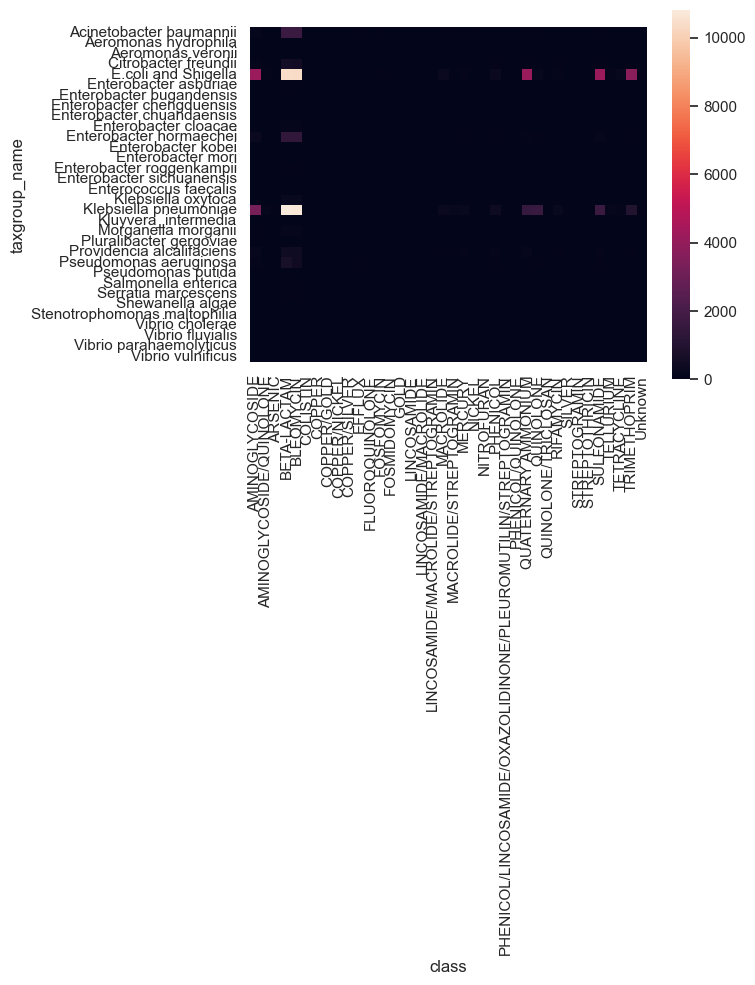

In [43]:
sns.heatmap(pd.pivot_table(df_unique[["taxgroup_name","class"]],
               index=["taxgroup_name"], 
               columns="class",
               aggfunc=len,
               fill_value=0),
               square=True,
               xticklabels=True,
               yticklabels=True)

## General Conclussions

Based on the analysis, this dataset can be used to look at trends of antibiotic resistance among different microbial isolates. From the initial exploration we can see that:

- The most abundant taxa in the dataset are _E. coli/Shigella_ and _K. pneuomonie_
- The most abundant antibiotic resistance class are Beta-lactam and Bleomicin

For the more detailed analysis, we will look at the information for _K. pneumoniae_